In [76]:
import pandas as pd

In [74]:
df_census = pd.read_csv("acs2017_census_tract_data.csv")
df_census = df_census[['State', 'County', 'TotalPop', 'Poverty', 'IncomePerCap']]
df_census['County'] = df_census['County'].map(lambda x: x.strip('County').strip())
df_census.head()

,State,County,TotalPop,Poverty,IncomePerCap
0,Alabama,Autauga,1845,10.7,33018.0
1,Alabama,Autauga,2172,22.4,18996.0
2,Alabama,Autauga,3385,14.7,21236.0
3,Alabama,Autauga,4267,2.3,28068.0
4,Alabama,Autauga,9965,12.2,36905.0


In [3]:
county_grouped = df_census.groupby(['State','County'])

In [4]:
county_grouped = county_grouped.agg({'TotalPop': 'sum', 'Poverty': 'mean', 'IncomePerCap': 'mean'})

In [5]:
county_grouped.head()

TotalPop    Poverty  IncomePerCap
State   County                                    
Alabama Autauga     55036  14.558333  26588.166667
        Baldwin    203360  12.874194  29130.709677
        Barbour     26201  27.755556  17891.666667
        Bibb        22580  13.925000  21799.000000
        Blount      57667  16.422222  21598.444444

In [6]:
county_grouped.loc[[('Virginia', 'Loudoun'), ('Oregon', 'Washington'), ('Kentucky', 'Harlan'), ('Oregon', 'Malheur')]]

,,TotalPop,Poverty,IncomePerCap
State,County,,,
Virginia,Loudoun,374558,3.884375,50391.015625
Oregon,Washington,572071,10.446154,34970.817308
Kentucky,Harlan,27548,33.318182,16010.363636
Oregon,Malheur,30421,24.414286,17966.428571


In [28]:
df_covid = pd.read_csv("COVID_county_data.csv")
df_covid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [29]:
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid.rename(columns={'state': 'State', 'county': 'County'}, inplace=True)

In [30]:
df_covid.columns

Index(['date', 'County', 'State', 'fips', 'cases', 'deaths'], dtype='object')

In [31]:
mask = (df_covid['date'] >= '2020-12-01') & (df_covid['date'] <= '2020-12-31')
df_covid_dec = df_covid.loc[mask]
# df_covid_dec = df_covid_dec.sum()[['cases', 'deaths']]
df_covid_dec.head()

,date,County,State,fips,cases,deaths
784134,2020-12-01,Autauga,Alabama,1001.0,2818,42.0
784135,2020-12-01,Baldwin,Alabama,1003.0,9051,137.0
784136,2020-12-01,Barbour,Alabama,1005.0,1189,11.0
784137,2020-12-01,Bibb,Alabama,1007.0,1204,18.0
784138,2020-12-01,Blount,Alabama,1009.0,3061,40.0


In [32]:
covid_grouped_dec = df_covid_dec.groupby(['State', 'County'])
covid_grouped_dec = covid_grouped_dec.agg({'cases': 'max', 'deaths': 'max'})
covid_grouped_dec.head()

cases  deaths
State   County                
Alabama Autauga   4190    48.0
        Baldwin  13601   161.0
        Barbour   1514    32.0
        Bibb      1834    46.0
        Blount    4641    63.0

In [33]:
# df_covid[['cases_reproted_dec_2020', 'deaths_reported_dec_2020']] = df_covid.apply(lambda x: df_covid.loc[(df_covid['date'] >= '2020-12-01') & (df_covid['date'] <= '2020-12-31'), ['cases', 'deaths']].sum())
df_covid = df_covid[['State', 'County', 'cases', 'deaths']]
df_covid.head()

,State,County,cases,deaths
0,Washington,Snohomish,1,0.0
1,Washington,Snohomish,1,0.0
2,Washington,Snohomish,1,0.0
3,Illinois,Cook,1,0.0
4,Washington,Snohomish,1,0.0


In [34]:
df_covid.head()

,State,County,cases,deaths
0,Washington,Snohomish,1,0.0
1,Washington,Snohomish,1,0.0
2,Washington,Snohomish,1,0.0
3,Illinois,Cook,1,0.0
4,Washington,Snohomish,1,0.0


In [35]:
covid_grouped = df_covid.groupby(['State', 'County'])
covid_grouped = covid_grouped.agg({'cases': 'max', 'deaths': 'max'})
covid_grouped [['cases_reported_dec_2020', 'deaths_reported_dec_2020']] = covid_grouped_dec[['cases', 'deaths']]
covid_grouped.head()

cases  deaths  cases_reported_dec_2020  \
State   County                                            
Alabama Autauga   6092    85.0                   4190.0   
        Baldwin  19392   262.0                  13601.0   
        Barbour   2067    50.0                   1514.0   
        Bibb      2414    58.0                   1834.0   
        Blount    6040   125.0                   4641.0   

                 deaths_reported_dec_2020  
State   County                             
Alabama Autauga                      48.0  
        Baldwin                     161.0  
        Barbour                      32.0  
        Bibb                         46.0  
        Blount                       63.0

In [38]:
covid_grouped.loc[[('Virginia', 'Loudoun'), ('Oregon', 'Washington'), ('Kentucky', 'Harlan'), ('Oregon', 'Malheur')]]

,,cases,deaths,cases_reported_dec_2020,deaths_reported_dec_2020
State,County,,,,
Virginia,Loudoun,22557,199.0,14169.0,159.0
Oregon,Washington,20866,209.0,16070.0,142.0
Kentucky,Harlan,2352,68.0,1538.0,18.0
Oregon,Malheur,3331,58.0,2914.0,50.0


In [52]:
df = covid_grouped.join(county_grouped)

In [53]:
df.head()

cases  deaths  cases_reported_dec_2020  \
State   County                                            
Alabama Autauga   6092    85.0                   4190.0   
        Baldwin  19392   262.0                  13601.0   
        Barbour   2067    50.0                   1514.0   
        Bibb      2414    58.0                   1834.0   
        Blount    6040   125.0                   4641.0   

                 deaths_reported_dec_2020  TotalPop    Poverty  IncomePerCap  
State   County                                                                
Alabama Autauga                      48.0   55036.0  14.558333  26588.166667  
        Baldwin                     161.0  203360.0  12.874194  29130.709677  
        Barbour                      32.0   26201.0  27.755556  17891.666667  
        Bibb                         46.0   22580.0  13.925000  21799.000000  
        Blount                       63.0   57667.0  16.422222  21598.444444

In [57]:
df['Total_Cases'] = df.apply(lambda row: (row['cases'] * 100000) / row['TotalPop'], axis=1)
df['Total_Deaths'] = df.apply(lambda row: (row['deaths'] * 100000) / row['TotalPop'], axis=1)

In [58]:
df.head()

cases  deaths  cases_reported_dec_2020  \
State   County                                            
Alabama Autauga   6092    85.0                   4190.0   
        Baldwin  19392   262.0                  13601.0   
        Barbour   2067    50.0                   1514.0   
        Bibb      2414    58.0                   1834.0   
        Blount    6040   125.0                   4641.0   

                 deaths_reported_dec_2020  TotalPop    Poverty  IncomePerCap  \
State   County                                                                 
Alabama Autauga                      48.0   55036.0  14.558333  26588.166667   
        Baldwin                     161.0  203360.0  12.874194  29130.709677   
        Barbour                      32.0   26201.0  27.755556  17891.666667   
        Bibb                         46.0   22580.0  13.925000  21799.000000   
        Blount                       63.0   57667.0  16.422222  21598.444444   

                  Total Cases  Total Deaths   Total_Cases  Total_Deaths  
State   County                                                           
Alabama Autauga  11069.118395    154.444364  11069.118395    154.444364  
        Baldwin   9535.798584    128.835563   9535.798584    128.835563  
        Barbour   7889.011870    190.832411   7889.011870    190.832411  
        Bibb     10690.876882    256.864482  10690.876882    256.864482  
        Blount   10473.927896    216.761753  10473.927896    216.761753

In [118]:
df_oregon = df.loc[df.index.get_level_values('State') == 'Oregon']

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
correlations = []
a = ('Total_Cases', 'Poverty')
correlations.append(a)
b = ('Total_Deaths', 'Poverty')
correlations.append(b)
c = ('Total_Cases', 'IncomePerCap')
correlations.append(c)
d = ('Total_Deaths', 'IncomePerCap')
correlations.append(d)
e = ('cases_reported_dec_2020', 'Poverty')
correlations.append(e)
f = ('deaths_reported_dec_2020', 'Poverty')
correlations.append(f)
g = ('cases_reported_dec_2020', 'IncomePerCap')
correlations.append(g)
h = ('deaths_reported_dec_2020', 'IncomePerCap')
correlations.append(h)


plots = []

for correlation in correlations:
    plot = (df_oregon[correlation[0]].corr(df[correlation[1]]), correlation[0], correlation[1])
    plots.append(plot)

R for Total_Cases vs Poverty = 0.19626280807425306
R for Total_Deaths vs Poverty = 0.24095099055190802
R for Total_Cases vs IncomePerCap = -0.38298538944796284
R for Total_Deaths vs IncomePerCap = -0.5103336402143774
R for cases_reported_dec_2020 vs Poverty = -0.15295719081094342
R for deaths_reported_dec_2020 vs Poverty = -0.08031013161838976
R for cases_reported_dec_2020 vs IncomePerCap = 0.5662321434044019
R for deaths_reported_dec_2020 vs IncomePerCap = 0.4999023143312516


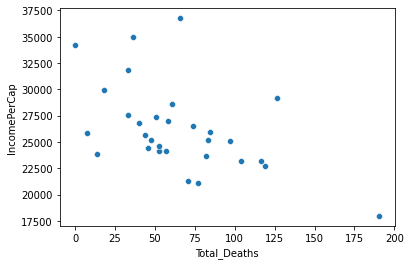

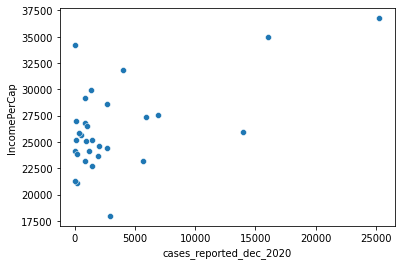

In [120]:
for plot in plots:
    R = plot[0]
    print(f"R for {plot[1]} vs {plot[2]} = {plot[0]}")
    if R > 0.5 or R < -0.5:
        plt.figure()
        sns.scatterplot(data=df_oregon, x=plot[1], y=plot[2])

In [121]:
plots.clear()

for correlation in correlations:
    plot = (df[correlation[0]].corr(df[correlation[1]]), correlation[0], correlation[1])
    plots.append(plot)

for plot in plots:
    R = plot[0]
    print(f"R for {plot[1]} vs {plot[2]} = {plot[0]}")
    if R > 0.5 or R < -0.5:
        plt.figure()
        sns.scatterplot(data=df, x=plot[1], y=plot[2])

R for Total_Cases vs Poverty = 0.12022994647462464
R for Total_Deaths vs Poverty = 0.20049720020898698
R for Total_Cases vs IncomePerCap = -0.20541255201485065
R for Total_Deaths vs IncomePerCap = -0.23946027915501586
R for cases_reported_dec_2020 vs Poverty = -0.018326019014729848
R for deaths_reported_dec_2020 vs Poverty = -0.017508685701395826
R for cases_reported_dec_2020 vs IncomePerCap = 0.18771428825410538
R for deaths_reported_dec_2020 vs IncomePerCap = 0.22019147176479775
